In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from pycaret.time_series import *

from sktime.forecasting.model_selection import SlidingWindowSplitter


stocks = pd.read_pickle('../Datas/tickers21-23')
stocks.head()

,AAPL,BABA,GIS,LLY,XOM
Date,,,,,
2021-03-18,119.096420,236.429993,56.396618,178.908676,51.951393
2021-03-19,118.562836,239.789993,56.556675,179.258850,51.658760
2021-03-22,121.922386,237.119995,57.855965,180.766541,51.128361
2021-03-23,121.082504,237.669998,57.611172,178.665512,50.497375
2021-03-24,118.661636,229.589996,55.191483,175.251328,51.521591


## Indexing

<Axes: xlabel='Date'>

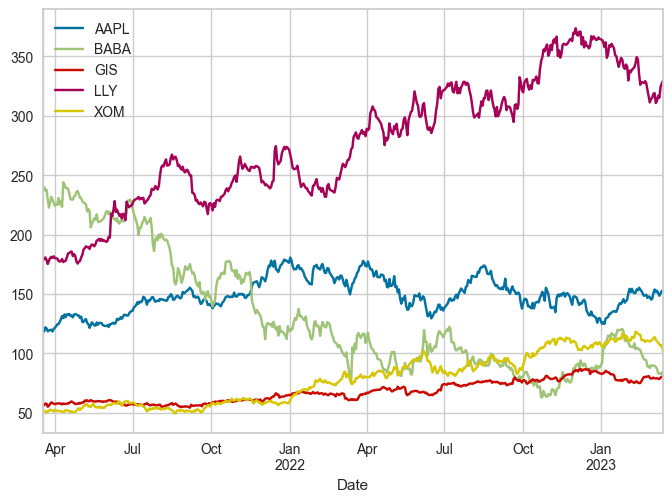

In [85]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.plot()

<Axes: xlabel='Date'>

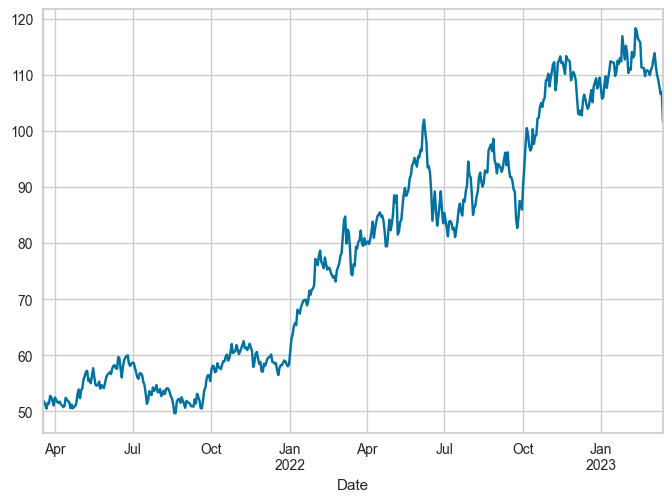

In [86]:
df = stocks['XOM']
df.plot()

In [87]:
idx = pd.period_range(min(df.index), max(df.index))
df.index.symmetric_difference(idx)
df = df.reindex(idx, fill_value=np.nan)
df = df.fillna(method = 'ffill')


In [88]:

exp = TSForecastingExperiment()
exp.setup(data = df, target='XOM' ,coverage=0.90, fold_strategy=SlidingWindowSplitter(fh=np.arange(1,23), window_length=130, step_length=130))

,Description,Value
0,session_id,4155
1,Target,XOM
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(520, 1)"
5,Transformed data shape,"(520, 1)"
6,Transformed train set shape,"(498, 1)"
7,Transformed test set shape,"(22, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [89]:
#exp.compare_models(sort='rmse')


In [90]:
naive = exp.create_model('naive')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:34:40
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-09-15'], dtype='period[B]')",0.6620,0.6631,3.3431,3.7153,0.0589,0.0608,-0.9721
1,"PeriodIndex(['2022-03-16'], dtype='period[B]')",0.6229,0.5353,6.5345,6.9136,0.0802,0.0839,-8.3744
2,"PeriodIndex(['2022-09-14'], dtype='period[B]')",0.8535,0.7969,5.4524,6.6435,0.0615,0.0590,-0.5320
Mean,nan,0.7128,0.6651,5.1100,5.7575,0.0669,0.0679,-3.2928
SD,nan,0.1008,0.1068,1.3252,1.4482,0.0095,0.0113,3.5977


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-09-15'], dtype='period[B]')",0.6620,0.6631,3.3431,3.7153,0.0589,0.0608,-0.9721
1,"PeriodIndex(['2022-03-16'], dtype='period[B]')",0.6229,0.5353,6.5345,6.9136,0.0802,0.0839,-8.3744
2,"PeriodIndex(['2022-09-14'], dtype='period[B]')",0.8535,0.7969,5.4524,6.6435,0.0615,0.0590,-0.5320
Mean,nan,0.7128,0.6651,5.1100,5.7575,0.0669,0.0679,-3.2928
SD,nan,0.1008,0.1068,1.3252,1.4482,0.0095,0.0113,3.5977


In [91]:
#naive

In [92]:
#exp.plot_model(estimator=naive, plot="diagnostics")

In [93]:
#exp.plot_model(naive, plot='insample')

In [94]:
#exp.plot_model(naive, plot='forecast', data_kwargs={'fh':36})

In [95]:
holdout_pred = exp.predict_model(naive)
holdout_pred


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,0.8604,0.7752,7.0664,7.7715,0.0647,0.0623,-4.7722


,y_pred
2023-02-14,117.8
2023-02-15,117.8
2023-02-16,117.8
2023-02-17,117.8
2023-02-20,117.8
2023-02-21,117.8
2023-02-22,117.8
2023-02-23,117.8
2023-02-24,117.8
2023-02-27,117.8


In [96]:
final_model = exp.finalize_model(naive)
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':24})
